In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import librosa.display
import seaborn as sns
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [8]:
gt=pd.read_csv("Data/features_3_sec.csv")
audio_path=r"Data/genres_original"
gt

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

In [9]:
gt=gt.drop(labels="filename",axis=1)
gt.shape

(9990, 59)

In [10]:
#description of the dataset  
print(gt.describe())

        length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611       

In [11]:
#check for null values
gt.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

/var/folders/6b/97ymbbc127369zq_4ypgy8j80000gn/T/ipykernel_64070/3479738757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(gt['label'],palette='twilight')


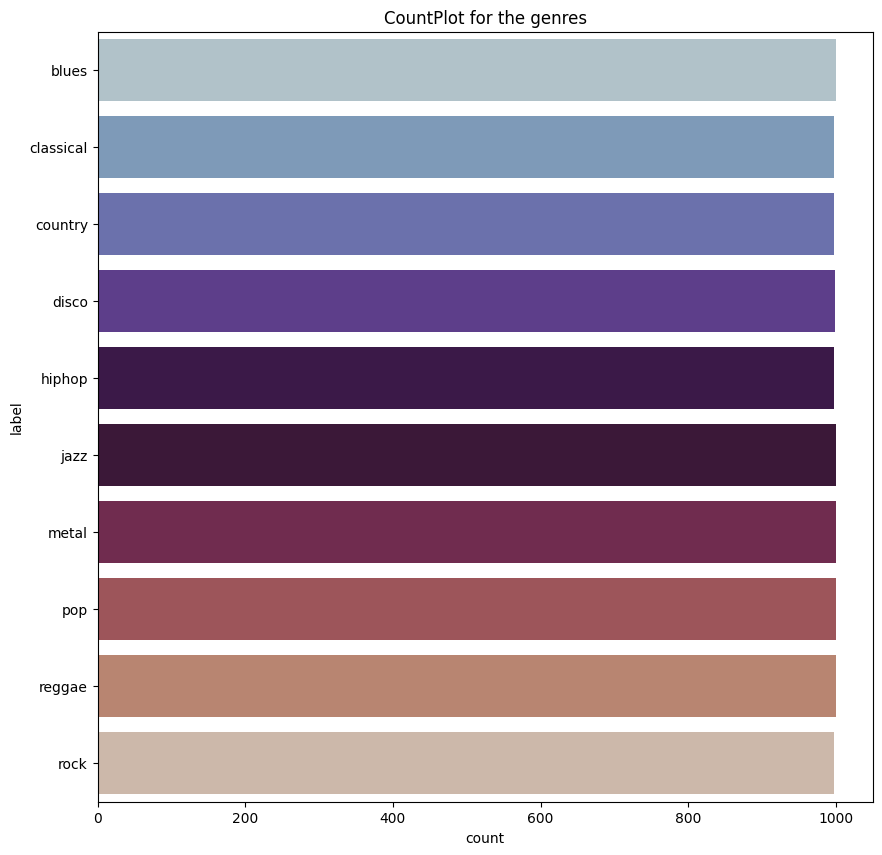

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(gt['label'],palette='twilight')
plt.title("CountPlot for the genres")
plt.show()

In [13]:
cn=LabelEncoder()
cn_op=cn.fit_transform(gt['label'])
gt.drop("label",axis=1,inplace=True)
gt["label"]=cn_op
gt

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              1972.744388   
1                1816.693777           90525.690866              2010.051501   
2                1788.539719          111407.437613              2084.565132   
3                1655.289045          111952.284517              1960.039988   
4                1630.656199           79667.267654              1948.503884   
...                      ...                    ...                      ...   
9985             1499.083005          164266.886443              1718.707215   
9986             1847.965128          281054.935973              1906.468492   
9987             1346.157659          662956.246325              1561.859087   
9988             2084.515327          203891.039161              2018.366254   
9989             1634.330126          411429.169769              1867.422378   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0              117335.771563   3714.560359  ...   39.687145    -3.241280   
1               65671.875673   3869.682242  ...   64.748276    -6.055294   
2               75124.921716   3997.639160  ...   67.336563    -1.768610   
3               82913.639269   3568.300218  ...   47.739452    -3.841155   
4               60204.020268   3469.992864  ...   30.336359     0.664582   
...                      ...           ...  ...         ...          ...   
9985            85931.574523   3015.559458  ...   42.485981    -9.094270   
9986            99727.037054   3746.694524  ...   32.415203   -12.375726   
9987           138762.841945   2442.362154  ...   78.228149    -2.524483   
9988            22860.992562   4313.266226  ...   28.323744    -5.363541   
9989           119722.211518   3462.042142  ...   38.801735   -11.598399   

      mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0      36.488243     0.722209   38.099152    -5.050335   33.618073   
1      40.677654     0.159015   51.264091    -2.837699   97.030830   
2      28.348579     2.378768   45.717648    -1.938424   53.050835   
3      28.337118     1.218588   34.770935    -3.580352   50.836224   
4      45.880913     1.689446   51.363583    -3.392489   26.738789   
...          ...          ...         ...          ...         ...   
9985   38.326839    -4.246976   31.049839    -5.625813   48.804092   
9986   66.418587    -3.081278   54.414265   -11.960546   63.452255   
9987   21.778994     4.809936   25.980829     1.775686   48.582378   
9988   17.209942     6.462601   21.442928     2.354765   24.843613   
9989   58.983097    -0.178517   55.761299    -6.903252   39.485901   

      mfcc20_mean  mfcc20_var  label  
0       -0.243027   43.771767      0  
1        5.784063   59.943081      0  
2        2.517375   33.105122      0  
3        3.630866   32.023678      0  
4        0.536961   29.146694      0  
...           ...         ...    ...  
9985     1.818823   38.966969      9  
9986     0.428857   18.697033      9  
9987    -0.299545   41.586990      9  
9988     0.675824   12.787750      9  
9989    -

In [16]:
d,s=librosa.load('Data/genres_original/blues/blues.00000.wav')
Audio(d,rate=s)

Sample No:  Data/genres_original/blues/blues.00000.wav


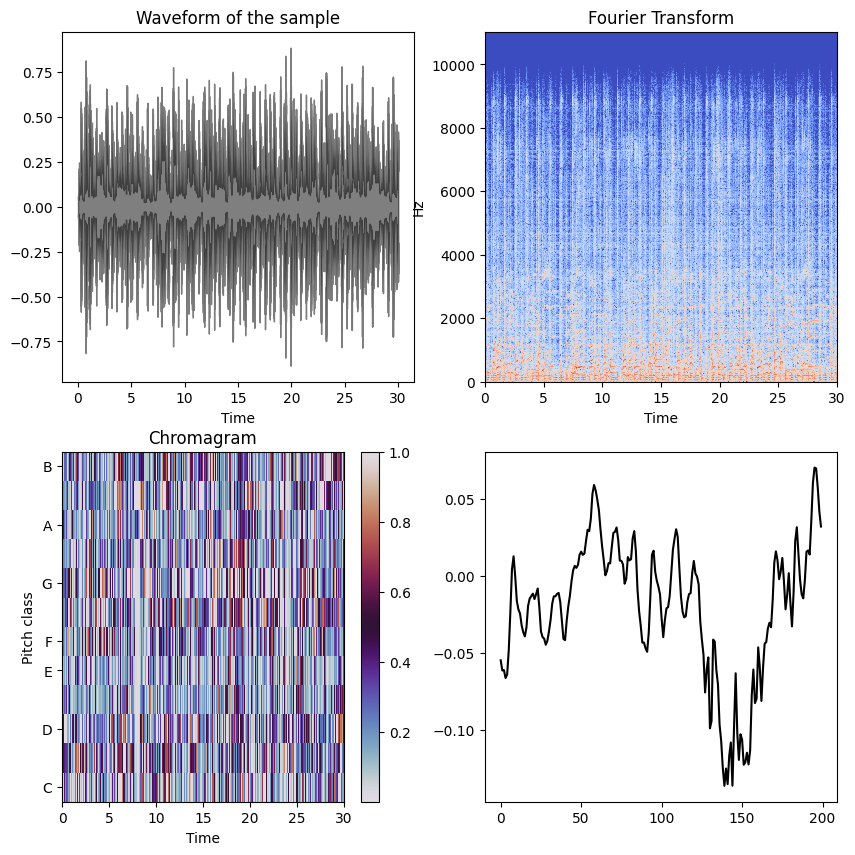

Sample No:  Data/genres_original/classical/classical.00000.wav


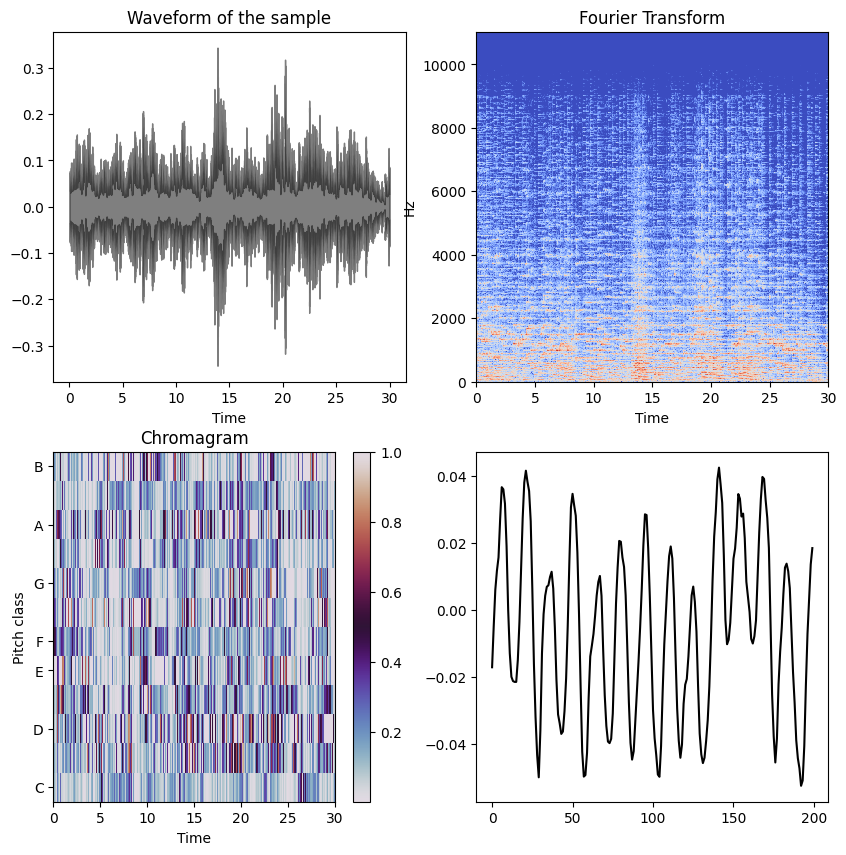

Sample No:  Data/genres_original/country/country.00000.wav


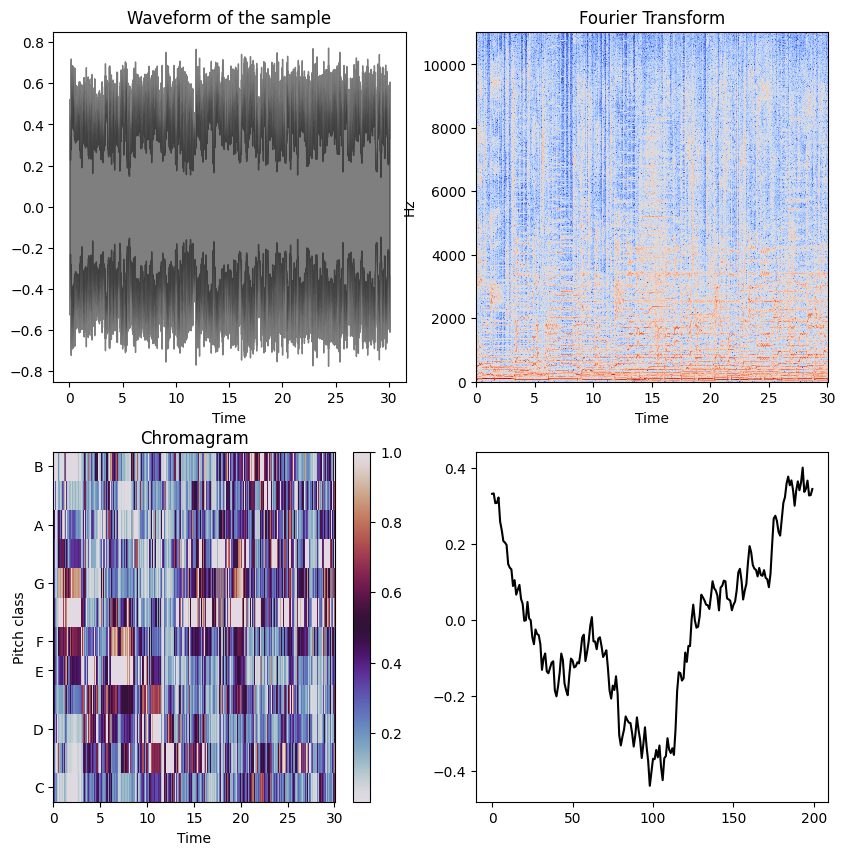

Sample No:  Data/genres_original/disco/disco.00000.wav


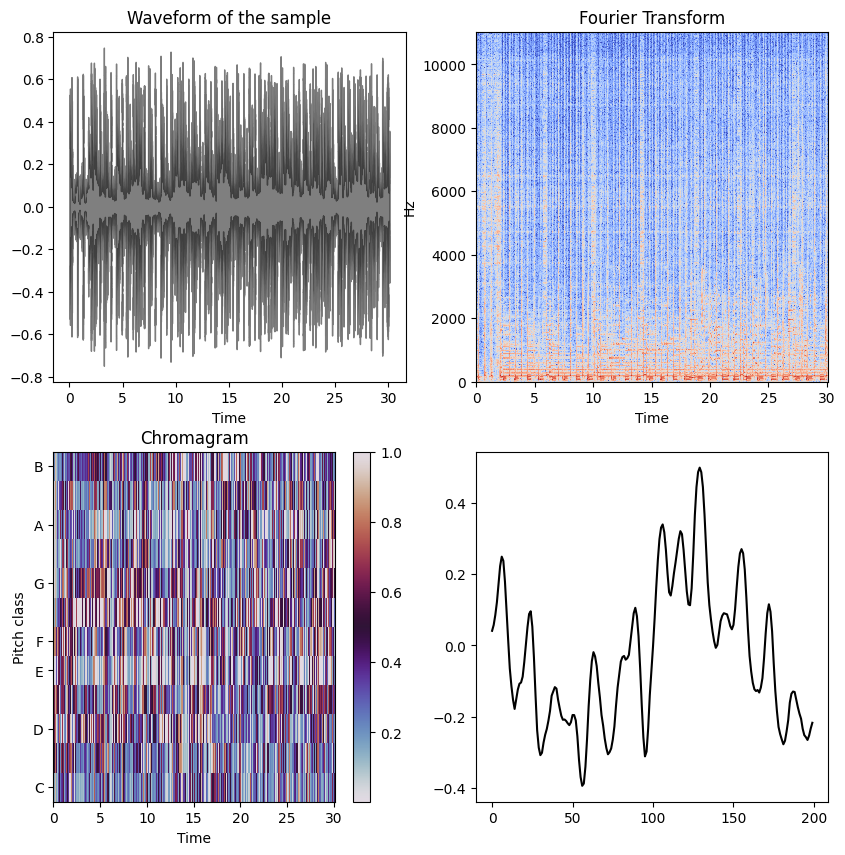

Sample No:  Data/genres_original/hiphop/hiphop.00000.wav


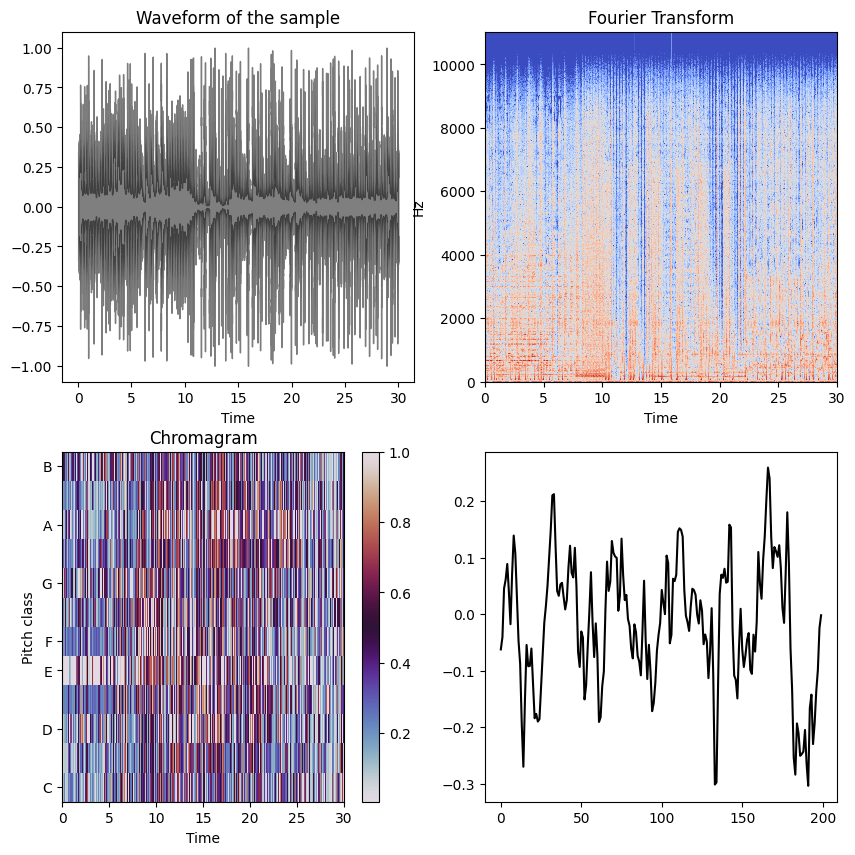

Sample No:  Data/genres_original/jazz/jazz.00000.wav


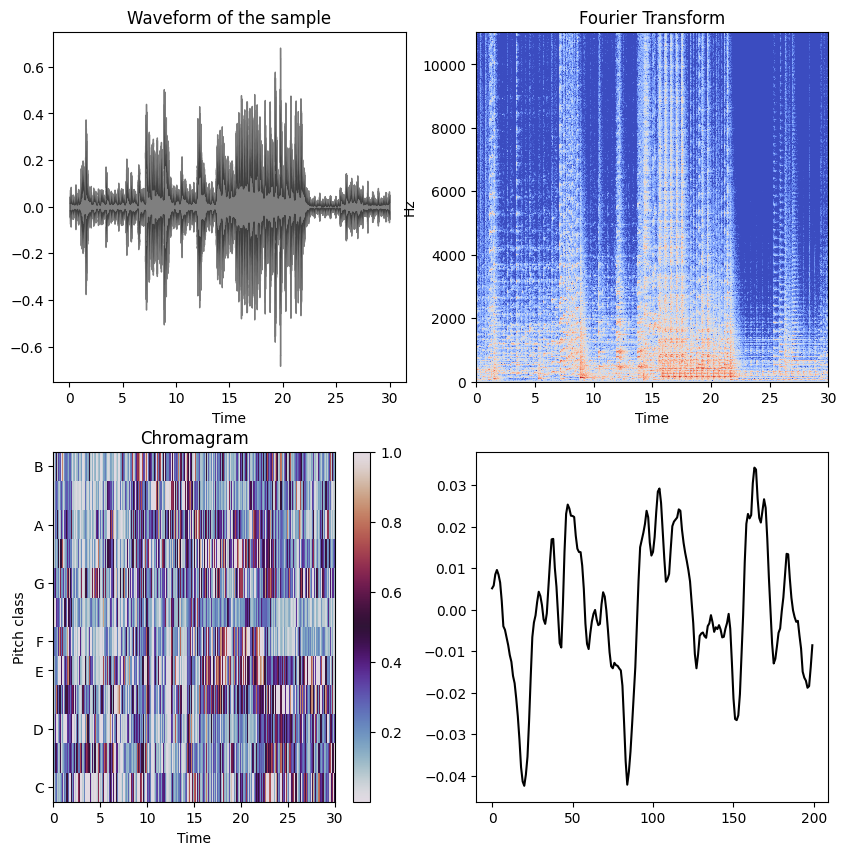

Sample No:  Data/genres_original/metal/metal.00000.wav


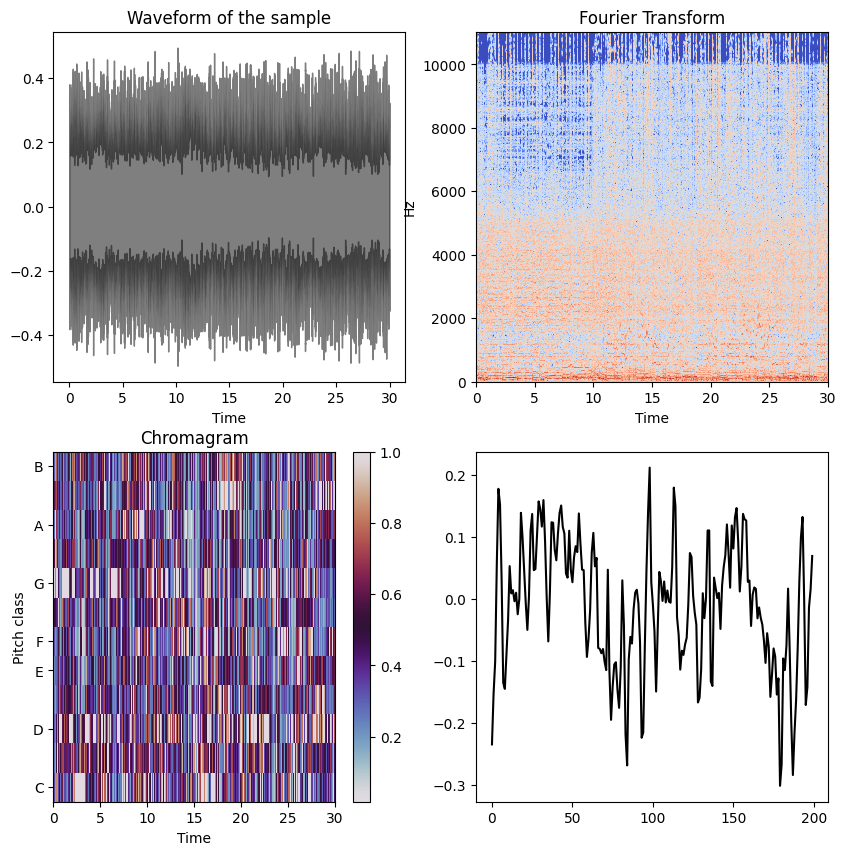

Sample No:  Data/genres_original/pop/pop.00000.wav


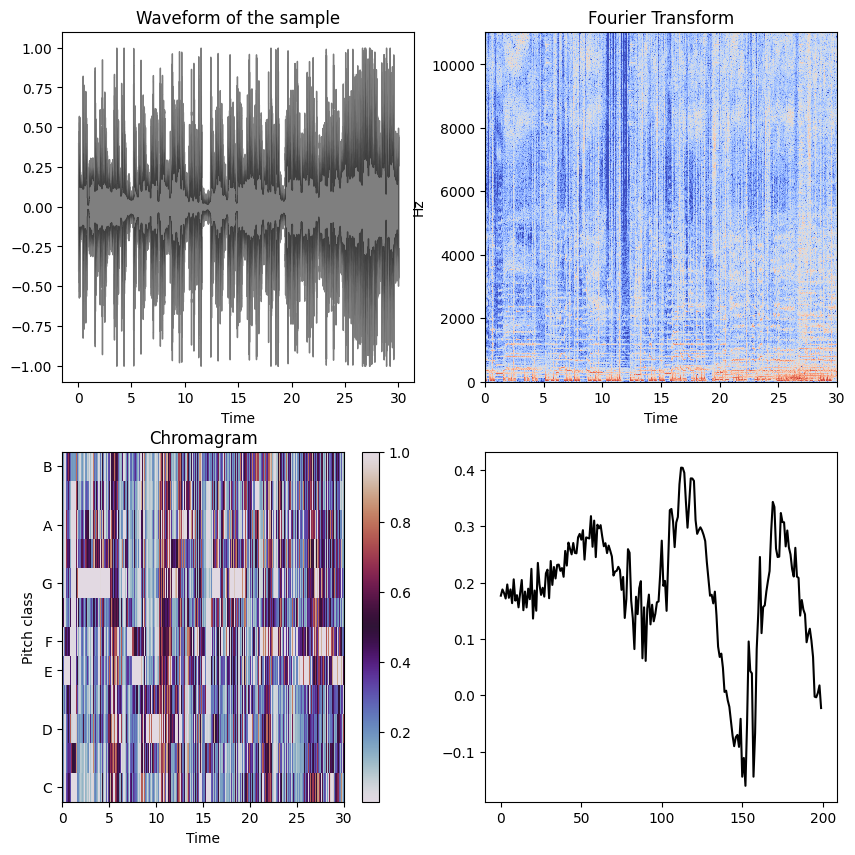

Sample No:  Data/genres_original/reggae/reggae.00000.wav


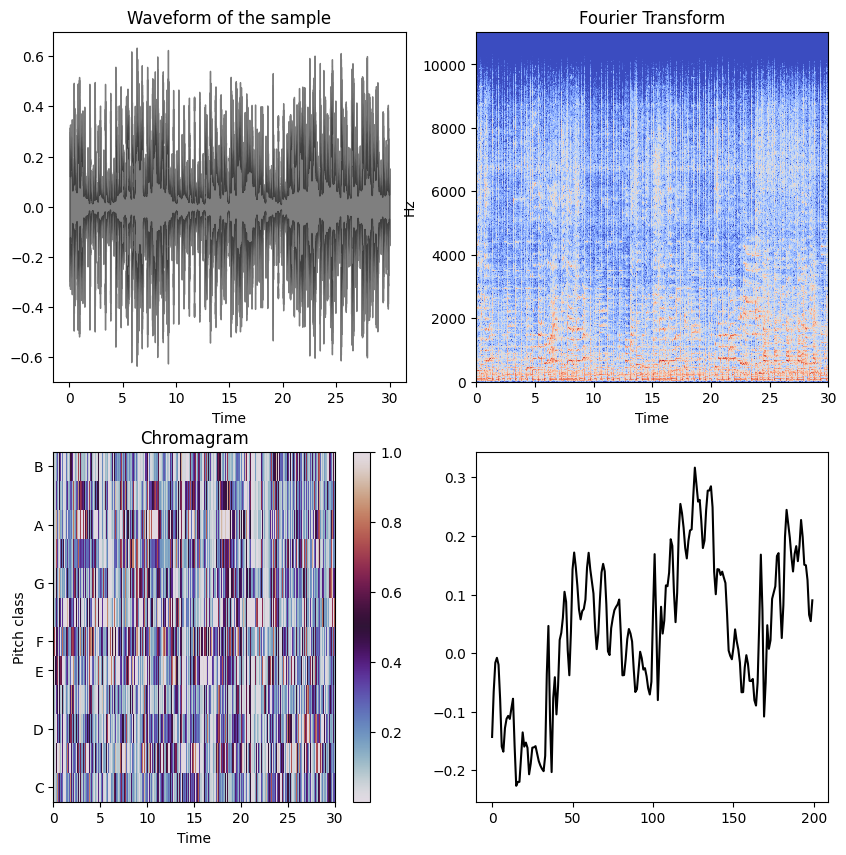

Sample No:  Data/genres_original/rock/rock.00000.wav


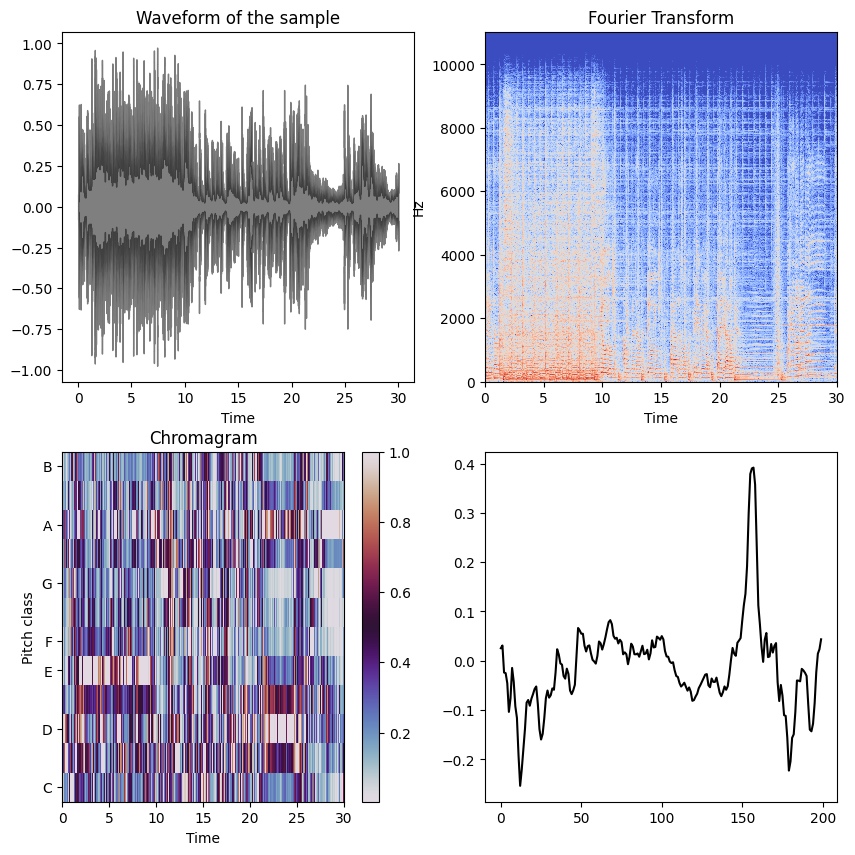

In [18]:
import IPython
files=['Data/genres_original/blues/blues.00000.wav','Data/genres_original/classical/classical.00000.wav',
       'Data/genres_original/country/country.00000.wav','Data/genres_original/disco/disco.00000.wav',
       'Data/genres_original/hiphop/hiphop.00000.wav','Data/genres_original/jazz/jazz.00000.wav',
       'Data/genres_original/metal/metal.00000.wav','Data/genres_original/pop/pop.00000.wav',
       'Data/genres_original/reggae/reggae.00000.wav','Data/genres_original/rock/rock.00000.wav']
for i in files:
  d,s=librosa.load(i)
  print("Sample No: ",i)
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  librosa.display.waveshow(d,color="black", alpha = 0.5);plt.title("Waveform of the sample")
  plt.subplot(2,2,2)
  ft=librosa.amplitude_to_db(abs(librosa.stft(d)))
  librosa.display.specshow(ft,sr=s,x_axis='time',y_axis='hz'),plt.title("Fourier Transform")
  plt.subplot(2,2,3)
  cg=librosa.feature.chroma_stft(y=d,sr=s)#Chromagram from any waveform
  librosa.display.specshow(cg,sr=s,x_axis="time",y_axis="chroma",cmap="twilight");plt.colorbar();plt.title("Chromagram")
  plt.subplot(2,2,4)
  plt.plot(d[1000:1200],color="black")
  
  plt.show()

In [19]:
#preprocessing
ssr=StandardScaler()
x=np.array(gt.iloc[:,:-1],dtype=float)
x=ssr.fit_transform(x)
y=gt.iloc[:,-1]
print(x)

[[ 0.         -0.48780784  0.64052047 ... -0.51356204  0.12841417
  -0.29178072]
 [ 0.         -0.40314187  0.13183473 ...  1.01138445  1.27578001
   0.05642464]
 [ 0.         -0.36169428  0.7644909  ... -0.04624405  0.65390663
  -0.52145798]
 ...
 [ 0.         -0.35433044  0.42997426 ... -0.15370124  0.11765485
  -0.33882395]
 [ 0.          0.0883611  -0.00630133 ... -0.72456977  0.30333409
  -0.95893743]
 [ 0.         -0.11321002  0.19536324 ... -0.37245283 -0.47495901
  -0.55112155]]


In [20]:
#training testing
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

Accuracy:  0.8838838838838838
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       297
           1       0.88      0.95      0.92       332
           2       0.78      0.85      0.81       309
           3       0.81      0.94      0.87       263
           4       0.91      0.87      0.89       291
           5       0.90      0.82      0.86       292
           6       0.96      0.97      0.96       274
           7       0.89      0.84      0.87       315
           8       0.91      0.92      0.91       326
           9       0.93      0.77      0.84       298

    accuracy                           0.88      2997
   macro avg       0.89      0.88      0.88      2997
weighted avg       0.89      0.88      0.88      2997



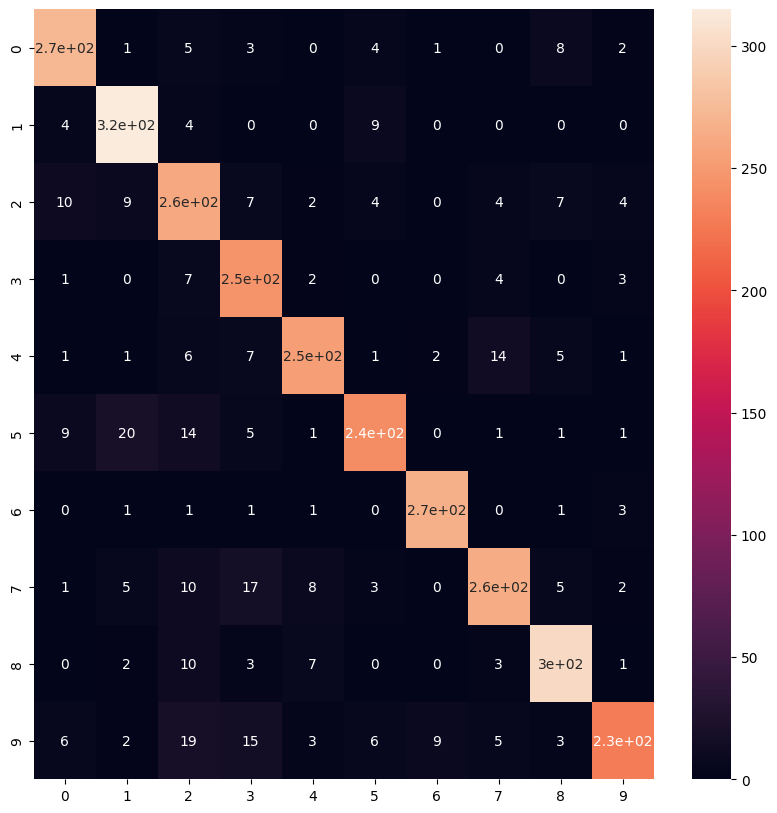

In [21]:
# Applying K nearest Neighbour algorithm to predict the results
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,knn_pred))
print(classification_report(Y_test,knn_pred))
knn_cm=confusion_matrix(Y_test, knn_pred)
plt.figure(figsize=(10,10))
sns.heatmap(knn_cm,annot=True)
plt.show()

Accuracy:  0.8551885218551886
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       297
           1       0.91      0.98      0.94       332
           2       0.84      0.80      0.82       309
           3       0.76      0.85      0.80       263
           4       0.91      0.78      0.84       291
           5       0.87      0.91      0.89       292
           6       0.89      0.92      0.90       274
           7       0.87      0.87      0.87       315
           8       0.85      0.85      0.85       326
           9       0.79      0.73      0.76       298

    accuracy                           0.86      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.86      0.86      0.85      2997



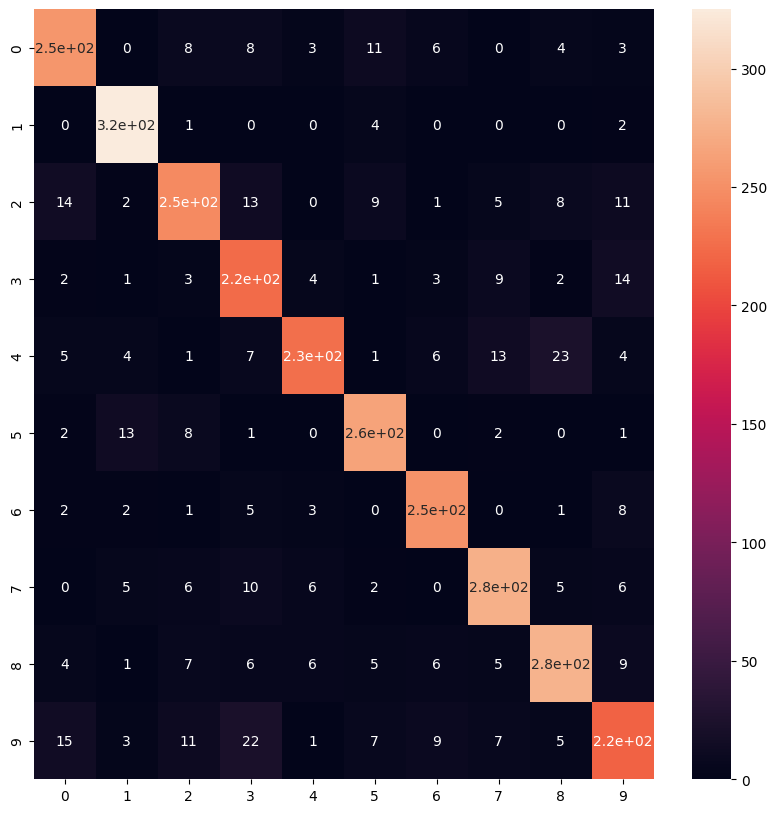

In [22]:
# Applying SVM algorithm to predict the results
svm=SVC(kernel='rbf', degree=8)
svm.fit(X_train,Y_train)
svm_pred=svm.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,svm_pred))
print(classification_report(Y_test,svm_pred))
svm_cm=confusion_matrix(Y_test,svm_pred)
plt.figure(figsize=(10,10))
sns.heatmap(svm_cm,annot=True)
plt.show()